####  Правительство Российской Федерации 
####  Федеральное государственное автономное образовательное учреждение высшего профессионального образования "Национальный исследовательский университет "Высшая школа экономики"

####   Московский институт электроники и математики Национального исследовательского университета "Высшая школа экономики"

####                  Департамент прикладной математики

####                                               ОТЧЕТ

####  По лабораторной работе № 1

#### По курсу «Численные методы»


#### ПРИМЕР 39
Хачатрян Армен БПМ-153

#### Москва – 2018г.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$ \begin{cases} \frac{d}{dx}y(x) = y(x)^2 + \frac{y(x)}{x} + \frac{1}{x^2} , \\
y(1) = 0 \end{cases}$$
$ h = 0.1, \space x \in[1,1.5] $

##### Аналитическое решение уравнения 
$$  \\ y(x) = \frac{-C - \ln{x} - 1}{x(c+\ln{x})} \\
y(1) = 0 \Rightarrow C = -1\\
Ответ: y(x) = \frac{-\ln{x}}{x(\ln{x}-1)}$$

In [12]:
# точное решение
def y(x):
    return -np.log(x)/(x*(np.log(x)-1))

### 1) Метод Эйлера

$$ y_{m+1} = y_{m} + h\cdot f(x_{m},y_m) $$
$$ \max_{0 \leq i \leq 5} |y(t_i)-y_i| = O(h) $$

In [13]:
# инициализируем функции и списки
Y = []
X = np.linspace(1,1.5,6)
Y.append(0)
h = 0.1
def f(x,y):
    return y**2+(y/x)+(1/(x**2))

In [14]:
# сам метод Эйлера 
for i in range(1,6):
    Y.append(Y[i-1] + h*f(X[i-1],Y[i-1]))

In [15]:
Y_real = y(X)

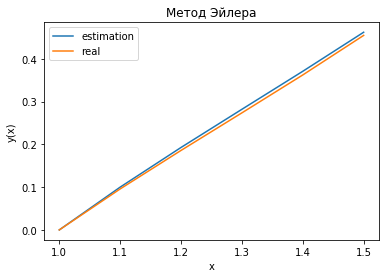

In [16]:
plt.title('Метод Эйлера')
plt.plot(X,Y,label = 'estimation')
plt.plot(X,Y_real, label = 'real')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

In [17]:
# Функция методом Эйлера (ответ_1)
Y

[0,
 0.1,
 0.19273553719008266,
 0.2819559751299623,
 0.3707664111180904,
 0.4620169075225582]

In [18]:
# error
Error_1 = []
print('Погрешности для метода Эйлера O(h)')
for i in range(6):
    Error_1.append(Y_real[i] - Y[i])
    print(Error_1[i])

Погрешности для метода Эйлера O(h)
0.0
-0.004226160094084844
-0.00692333690031291
-0.008353904008370605
-0.008555023536567397
-0.007358861782010839


### 2) Метод серединных прямоугольников

$$ y_{m+1} = y_{m} + h\cdot f(x_{m}+\frac{h}{2},y_m+\frac{h}{2}f(x_m.y_m)) $$
$$ \max_{0 \leq i \leq 5} |y(t_i)-y_i| = O(h^2) $$

In [19]:
Y_1 = []
Y_1.append(0)
for i in range(1,6):
    Y_1.append(Y_1[i-1] + h*f(X[i-1]+h/2,Y_1[i-1]+h*f(X[i-1],Y_1[i-1])/2))

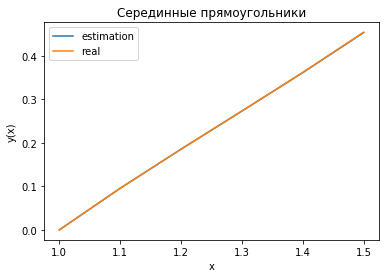

In [20]:
plt.title('Серединные прямоугольники')
plt.plot(X,Y_1,label = 'estimation')
plt.plot(X,Y_real, label = 'real')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

In [21]:
# Функция методом сер. прямоуг. (ответ_2)
Y_1

[0,
 0.09571485260770975,
 0.18567567233079654,
 0.2733478017046135,
 0.3617730189639929,
 0.45393137538291234]

In [22]:
# error
Error_2 =[]
print('Погрешности метода серединных прямоугольников O(h^2)')
for i in range(6):
    Error_2.append(Y_real[i] - Y_1[i])
    print(Error_2[i])

Погрешности метода серединных прямоугольников O(h^2)
0.0
5.898729820541515e-05
0.0001365279589732038
0.0002542694169782034
0.0004383686175301049
0.0007266703576350175


### 3) Рунге-Кутта 4 порядка

$$ y_{k+1} = y_{k} + \frac{h}{6}(f_1+2f_2+2f_3 + f_4), \text{где} \\
f_1 = f(x_k,y_k), f_2 = f(x_k + \frac{h}{2},y_{k}+\frac{h}{2}f_{1}) \\
f_3 = f(x_k + \frac{h}{2}, y_k + \frac{h}{2}f_2), f_4 = f(x_k + h, y_k + hf_3)$$
$$ \max_{0 \leq i \leq 5} |y(t_i)-y_i| = O(h^3)  $$

In [23]:
def RK_4(x_k,y_k):
    f1 = f(x_k,y_k)
    f2 = f(x_k + h/2, y_k+h*f1/2)
    f3 = f(x_k + h/2, y_k + h*f2/2)
    f4 = f(x_k + h, y_k+ h*f3)
    return y_k + h*(f1 + 2*f2 + 2*f3 + f4)/6

In [24]:
Y_2 = []
Y_2.append(0)
for i in range(1,6):
    Y_2.append(RK_4(X[i-1],Y_2[i-1]))

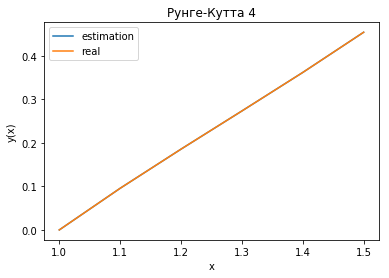

In [25]:
plt.title('Рунге-Кутта 4')
plt.plot(X,Y_2,label = 'estimation')
plt.plot(X,Y_real, label = 'real')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

In [26]:
# Функция методом РК4 (ответ_3)
Y_2

[0,
 0.09577445340787209,
 0.18581327438142586,
 0.2736035388854841,
 0.36221322834373254,
 0.45466026360821765]

In [27]:
Error_3 = []
# error
print('Погрешности метода РК4 O(h^4)')
for i in range(6):
    Error_3.append(Y_real[i] - Y_2[i])
    print(Error_3[i])

Погрешности метода РК4 O(h^4)
0.0
-6.135019569308842e-07
-1.0740916561169378e-06
-1.4677638924265324e-06
-1.84076220954843e-06
-2.2178676702955258e-06


### Ответ

In [28]:
import pandas as pd
data = [Y_real,Y,Error_1,Y_1,Error_2,Y_2,Error_3]
pd.DataFrame(data, index = ['Истинное зн.','1) Метод Эйлера','погр. МЭ',
                            '2) Метод Сер. Прям.','погр МСП','3) RK4',
                            'погр. RK4'])

,0,1,2,3,4,5
Истинное зн.,0.0,9.577384e-02,0.185812,0.273602,0.362211,0.454658
1) Метод Эйлера,0.0,1.000000e-01,0.192736,0.281956,0.370766,0.462017
погр. МЭ,0.0,-4.226160e-03,-0.006923,-0.008354,-0.008555,-0.007359
2) Метод Сер. Прям.,0.0,9.571485e-02,0.185676,0.273348,0.361773,0.453931
погр МСП,0.0,5.898730e-05,0.000137,0.000254,0.000438,0.000727
3) RK4,0.0,9.577445e-02,0.185813,0.273604,0.362213,0.454660
погр. RK4,0.0,-6.135020e-07,-0.000001,-0.000001,-0.000002,-0.000002
